# Deliverable 3: Optimize Neural Network

1. Pre-process input dataset.
2. Evaluate number of neurons in hidden layers.
3. **DEEP LEARNING**: Evaluate hidden layers.
4. Evaluate activation function for the hidden layers.
5. Evaluate epochs in the training regimen.


### Import Dependencies / Data

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### 1. Preprocess input dataset

A. Drop 'EIN' and 'NAME' columns as well as rows with missing values

B. Determine the number of unique values in each column

C. Bucketing / Binning

    i. APPLICATION_TYPE 
    ii. CLASSIFICATION 
    iii. ASK_AMT



In [2]:
# A. Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], 1)
application_df = application_df.drop(["NAME"], 1)
application_df.head()


application_df.dropna(inplace=True)


In [3]:
# B. Determine the number of unique values in each column.
# application_df[application_df].nunique()
application_unique_df = application_df.nunique()
application_unique_df

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Ci. Binning: APPLICATION_TYPE
application_counts = application_df.APPLICATION_TYPE.value_counts()


# Determine which values to replace if counts are less than ...?
# 500

# Use a Python for loop and Pandas' replace method
# to BIN application_counts < 500 into new column, "Other" 

# 1. Determine which values to replace
replace_application = list(application_counts[application_counts < 500].index)

# 2. Replace in DataFrame
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")


# 3. Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Cii. Binning: CLASSIFICATION
classification_counts = application_df.CLASSIFICATION.value_counts()


# Determine which values to replace if counts are less than ..?

replace_classification = list(classification_counts[classification_counts < 1000].index)


# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

****Note to Grader:  Attempted binning ASK_AMT (below).  DID not have positive affect on model accuracy****

In [6]:
# Ciii. Binning: ASK_AMT
ASK_AMT_counts = application_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

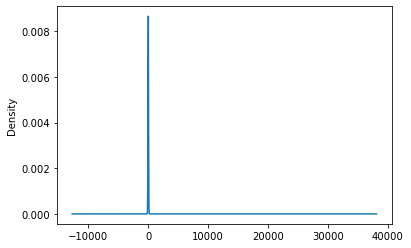

In [7]:
# Visualize the value counts of CLASSIFICATION
# Determine which values to replace if counts are less than ..?
ASK_AMT_counts.plot.density()

# Note: Tail within the distribution

In [8]:
# # ciii. Binning ASK_AMT

# replace_ASK_AMT = list(ASK_AMT_counts[ASK_AMT_counts < 5].index)


# # Replace in dataframe
# for ask in replace_ASK_AMT:
#     application_df.ASK_AMT = application_df.ASK_AMT.replace(ask, "Other")
    
# # Check to make sure binning was successful
# application_df.ASK_AMT.value_counts()


# *****NOTE:  DID NOT INCREASE MODEL ACCURACY, Therefore, remove from model*****



In [9]:
#cannot converge past 53% accuracy with "other" data bin.
# application_df = application_df[application_df['INCOME_AMT'] != "Other"]
# application_df

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat


# * Shows there are 7 categorical variables that need encoding.  

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
# (identifies all unique column values and splits single categorical 
# column into a series of columns)


enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))



# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25724, 43)
(8575, 43)
(25724,)
(8575,)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

****Note to Grader:  Attempted multiple models below in order to get higher accuracy.***  

1. 

In [15]:
# # *******Model Attempt Number 1*******

# #==========================================================
# # Results FROM THIS MODEL (on test data)
# #____________________________
# # 268/268 - 0s - loss: 0.7891 - accuracy: 0.5332
# # Loss: 0.7890744209289551, Accuracy: 0.5331778526306152
# #==========================================================
# # Evaluate a different model.  


# # Create the Keras Sequential model
# nn_model = tf.keras.models.Sequential()


# # Add our first Dense layer, including the input layer
# nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=43))
# # nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))



# # activation function: ReLU, for non-linaer relationships
# # units: 1 - paramter indicates # of neurons in the hidden layer
# # input_dim: 2 - paramter indicates # of model inputs


# # Add the output layer that uses a probability activation function
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# # Check the structure of the Sequential model Using the summary() method
# nn_model.summary()


In [16]:
# *******Model Attempt Number 2*******

#==========================================================
# Results FROM THIS MODEL (on test data)
#____________________________
# 268/268 - 0s - loss: 0.6066 - accuracy: 0.6897
# Loss: 0.6066150665283203, Accuracy: 0.6896793246269226
#==========================================================
#Accuracy is low.  Evaluate a different model.  



# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 70


nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 9,261
Trainable params: 9,261
Non-trainable params: 0
_________________________________________________________________


In [17]:
# # *******Model Attempt Number 3*******

# #==========================================================
# # Results FROM THIS MODEL (on test data)
# #____________________________
# #  268/268 - 0s - loss: 0.5532 - accuracy: 0.7271
# #  Loss: 0.5531989932060242, Accuracy: 0.7271137237548828
# #==========================================================
# Evaluate a different model.


# # Define the model - deep neural net
# number_input_features = len(X_train[0])
# hidden_nodes_layer1 =  80
# hidden_nodes_layer2 = 70
# hidden_nodes_layer3 = 60
# hidden_nodes_layer4 = 50
# hidden_nodes_layer5 = 40
# hidden_nodes_layer6 = 30

# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# nn_model.add(
#     tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
# )

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# # Third hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# # Fourth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# # Sixth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# # Output layer
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()

In [18]:
# # *******Model Attempt Number 4*******

# #==========================================================
# # Results FROM THIS MODEL (on test data)
# #____________________________
# # 268/268 - 0s - loss: 0.5520 - accuracy: 0.7269
# # Loss: 0.5520287752151489, Accuracy: 0.7268804907798767
# #==========================================================
# # Evaluate a different model.


# # Define the model - deep neural net
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 =  80
# hidden_nodes_layer2 = 70
# hidden_nodes_layer3 = 60
# hidden_nodes_layer4 = 50
# hidden_nodes_layer5 = 40
# hidden_nodes_layer6 = 30

# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# nn_model.add(
#     tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
# )

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# # Third hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# # Fourth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# # Sixth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# # Output layer
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()

In [19]:
# *******Model Attempt Number 5*******

#==========================================================
# Results FROM THIS MODEL
#____________________________
# 268/268 - 0s - loss: 0.5520 - accuracy: 0.7273
# Loss: 0.5519730448722839, Accuracy: 0.7273469567298889
#==========================================================



# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 70
hidden_nodes_layer3 = 60
hidden_nodes_layer4 = 50
hidden_nodes_layer5 = 40
hidden_nodes_layer6 = 30

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Fourth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_5 (Dense)              (None, 60)                4260      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_7 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [20]:
# # *******Model Attempt Number 6*******
# # ******Random Forest Classifier******

# #==========================================================
# # Results FROM THIS MODEL (on test data)
# #____________________________
# # Random forest predictive accuracy: 0.710
# #==========================================================
# # Evaluate a different model.


# # Imports
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score


# # Create a random forest classifier.
# rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# # Fitting the model
# rf_model = rf_model.fit(X_train_scaled, y_train)

# # Evaluate the model
# y_pred = rf_model.predict(X_test_scaled)
# print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")


In [21]:
# # *******Model Attempt Number 7*******
# # ******Support Vector Machine******

# #==========================================================
# # Results FROM THIS MODEL (on test data)
# #____________________________
# # SVM predictive accuracy: 
# #==========================================================
# # Model Locks up when attempting to run


# # Imports
# from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC


# # Create the SVM model
# svm = SVC(kernel='linear')


# # Train the model
# svm.fit(X_train, y_train)

# # Evaluate the model
# y_pred = svm.predict(X_test_scaled)
# print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")


In [22]:
# # *******Model Attempt Number 8*******
# # ******Logistic Regreession******

# #==========================================================
# # Results FROM THIS MODEL (on test data)
# #____________________________
# # Logistic regression model accuracy: 0.467
# #==========================================================
# # Evaluate a different model.

# # Imoports
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Define the logistic regression model
# log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# # Train the model
# log_classifier.fit(X_train,y_train)

# # Evaluate the model
# y_pred = log_classifier.predict(X_test)
# print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [23]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"



# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)



# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=30, callbacks=[cp_callback])


Epoch 1/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5799 - accuracy: 0.7105
Epoch 2/30
166/804 [=====>........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7299
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7308
Epoch 3/30
385/804 [=============>................] - ETA: 0s - loss: 0.5532 - accuracy: 0.7296
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7298
Epoch 4/30
569/804 [====================>.........] - ETA: 0s - loss: 0.5543 - accuracy: 0.7305
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7313
Epoch 5/30
780/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7348
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [============

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5511 - accuracy: 0.7264
Loss: 0.551091194152832, Accuracy: 0.7264139652252197


<AxesSubplot:>

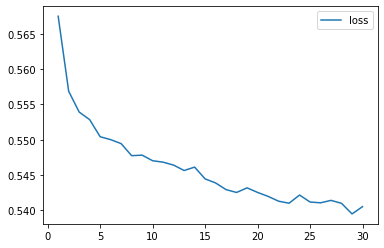

In [26]:
# visualize model's loss over the full 30 epochs

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

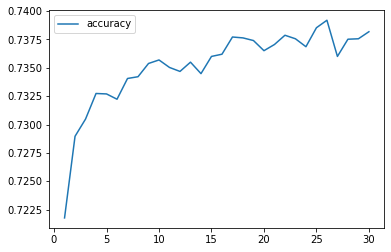

In [27]:
# Plot model's accuracy over all epochs
history_df.plot(y="accuracy")

In [28]:
# ~ 25-30 epochs is sufficient for this model.  

In [30]:
# Export model to HDF5 file

nn_model.save("AlphabetSoupCharity_Optimization.h5")